In [4]:
"""
Plotting functionality using basemap

Adapted from https://matplotlib.org/basemap/users/examples.html
"""
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [5]:
from load_catch_from_bigquery import load_BQ_and_clean

In [9]:
cleaned = load_BQ_and_clean()

Establishing connection to BigQuery in GCP.
    SUCCESS: Connection to BigQuery in GCP established.
Extracting catch data from 2010 to October 2018.
Extracting catch data from December 2018 onwards.
Merging and cleaning catch data
DONE after 10.16sec: Data extracted, merged and cleaned.


In [49]:
cleaned

,Vessel,Date,Total catch Krill - Mt,Total Krill Meal Kg,Position,Area,Trawl depth (m),Baric pressure (hPa),Water temp (Celsius),Krill Size (mm),Krill weight (gram),Comments,TripNumber,Wind direction,Wind speed (kn),FishingCondition,ReasonForNoOrBadFishing,Latitude,Longitude
0,Saga Sea,2010-01-14,356.150,35750.0,60°19 S 46°38 W,,NaN,NaN,NaN,43.30,0.69,,NaN,None,NaN,NaN,NaN,60.316667,46.633333
1,Saga Sea,2010-01-15,227.770,32250.0,60°24 S 46°38 W,,NaN,NaN,NaN,43.90,0.78,,NaN,None,NaN,NaN,NaN,60.400000,46.633333
2,Saga Sea,2010-01-16,439.060,58750.0,60°23 S 46°39 W,,NaN,NaN,NaN,43.40,0.75,,NaN,None,NaN,NaN,NaN,60.383333,46.650000
3,Saga Sea,2010-01-17,755.750,90000.0,60°25 S 46°40 W,,NaN,NaN,NaN,47.20,0.95,,NaN,None,NaN,NaN,NaN,60.416667,46.666667
4,Saga Sea,2010-01-18,406.260,62100.0,60°27 S 46°36 W,,NaN,NaN,NaN,41.80,0.55,,NaN,None,NaN,NaN,NaN,60.450000,46.600000
5,Saga Sea,2010-01-19,459.740,63475.0,60°21 S 46°38 W,,NaN,NaN,NaN,39.90,0.50,,NaN,None,NaN,NaN,NaN,60.350000,46.633333
6,Saga Sea,2010-01-20,460.160,61350.0,60°23 S 46°38 W,,NaN,NaN,NaN,45.60,0.84,,NaN,None,NaN,NaN,NaN,60.383333,46.633333
7,Saga Sea,2010-01-21,460.810,57000.0,60°23 S 46°39 W,,NaN,NaN,NaN,44.00,0.74,,NaN,None,NaN,NaN,NaN,60.383333,46.650000
8,Saga Sea,2010-01-22,405.270,60625.0,60°20 S 46°36 W,,NaN,NaN,NaN,44.20,0.73,,NaN,None,NaN,NaN,NaN,60.333333,46.600000
9,Saga Sea,2010-01-23,373.360,45675.0,60°23 S 46°37 W,,NaN,NaN,NaN,47.60,0.85,,NaN,None,NaN,NaN,NaN,60.383333,46.616667


In [41]:
latitude = cleaned['Latitude']
latitude *= -1

longitude = cleaned['Longitude']
longitude *= -1

In [47]:
lats = latitude.tolist()
longs = longitude.tolist()
lats

[60.31666666666667,
 60.4,
 60.38333333333333,
 60.416666666666664,
 60.45,
 60.35,
 60.38333333333333,
 60.38333333333333,
 60.333333333333336,
 60.38333333333333,
 60.333333333333336,
 60.31666666666667,
 60.333333333333336,
 60.266666666666666,
 60.35,
 60.333333333333336,
 60.333333333333336,
 60.28333333333333,
 60.36666666666667,
 60.36666666666667,
 60.36666666666667,
 60.416666666666664,
 60.45,
 60.416666666666664,
 60.5,
 60.38333333333333,
 60.43333333333333,
 60.4,
 60.333333333333336,
 60.46666666666667,
 60.233333333333334,
 60.416666666666664,
 60.31666666666667,
 60.38333333333333,
 60.35,
 60.36666666666667,
 60.45,
 60.4,
 60.35,
 60.35,
 60.36666666666667,
 60.35,
 60.36666666666667,
 60.516666666666666,
 60.43333333333333,
 60.25,
 60.36666666666667,
 60.36666666666667,
 60.35,
 60.4,
 60.4,
 60.36666666666667,
 60.31666666666667,
 60.333333333333336,
 60.38333333333333,
 60.4,
 60.38333333333333,
 60.333333333333336,
 60.31666666666667,
 60.25,
 60.38333333333333,


lat (33.9,64.98333333333333) lon (1.9666666666666668,62.983333333333334)


C:\Users\ua388\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\ua388\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


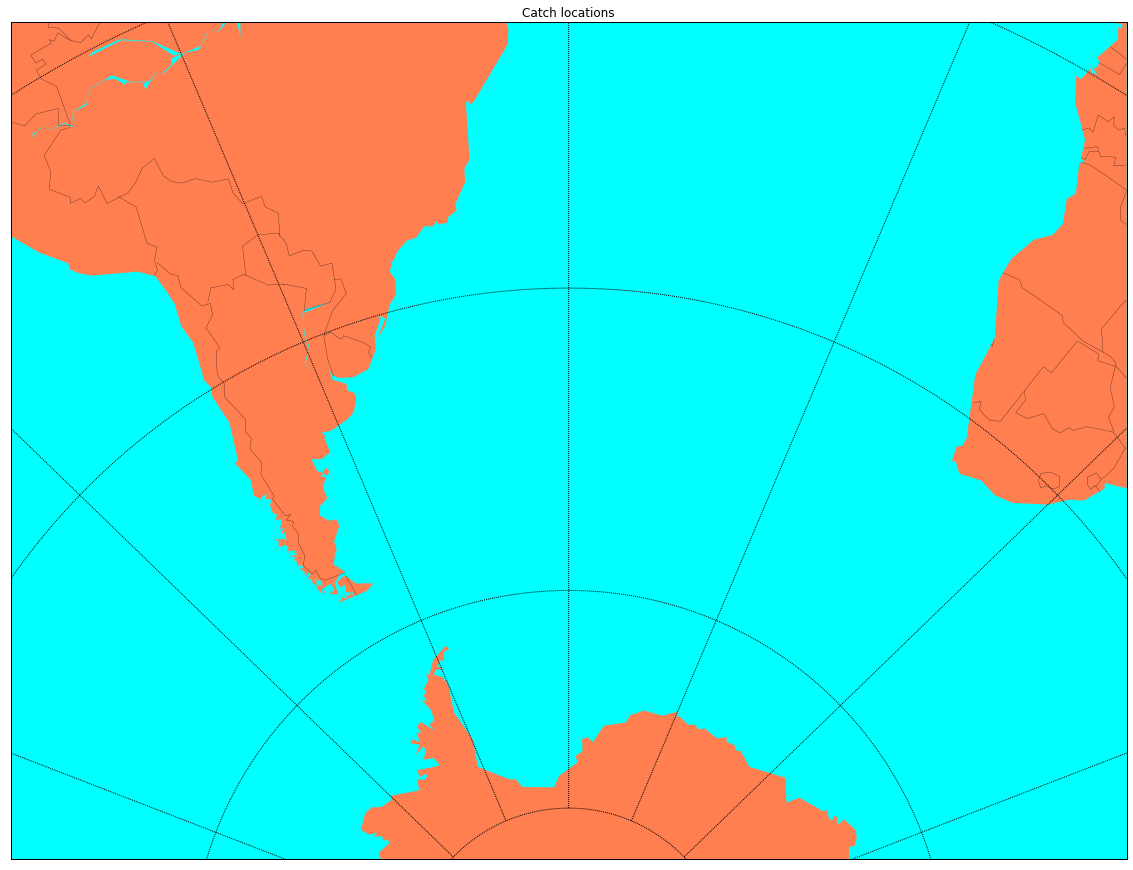

In [46]:
# %%
print("lat ({lat_min},{lat_max}) lon ({lon_min},{lon_max})".format(lat_min=min(lats),
                                                                   lat_max=max(lats), lon_min=min(longs),
                                                                   lon_max=max(longs)))

# %%
mpl.rcParams['figure.figsize'] = (20, 20)


min_lat = -33.9
max_lat = -64.98
min_lon = -1.96
max_lon = -62.98

#fig = Basemap(projection='aea', lat_0=-59, lon_0=-65, resolution='f', llcrnrlat=-70, urcrnrlat=-48, llcrnrlon=-90,
#              urcrnrlon=-40)
#fig = Basemap(projection='aea',lat_0=-62,lon_0=-55,resolution='f',
#    llcrnrlat=min_lat,urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon)

fig = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-33,lat_2=-65,lat_0=-45,lon_0=-30)

fig.drawcountries(linewidth=0.25)
fig.fillcontinents(color='coral', lake_color='aqua')
fig.drawmapboundary(fill_color='aqua')

fig.drawmeridians(np.arange(0, 360, 30))
fig.drawparallels(np.arange(-90, 90, 30))

fig.scatter(longs, lats, marker='o', facecolors='b', edgecolors='b', zorder=10, latlon=True, alpha=0.3, s=40)

plt.title('Catch locations')
plt.show()